This is testing code I have used to verify my code is correct and to debug it

In [18]:
from qiskit.circuit.library.arithmetic import IntegerComparator, ModularAdderGate, DraperQFTAdder
from qiskit.quantum_info import Statevector
from qiskit.circuit import QuantumCircuit, QuantumRegister
import qiskit.quantum_info as qi
from long_division_divider import ctrl_add, alt_adder, adder, cmpr, long_division_divider, other_divider
import numpy as np
from qiskit_ibm_runtime import QiskitRuntimeService

In [ ]:
QiskitRuntimeService.save_account(
  token="",
  channel="ibm_quantum" # `channel` distinguishes between different account types
)

In [2]:
qft_circ = DraperQFTAdder(3).control(1)
state = Statevector.from_label(
    #BBB AAA       B - A A
    '0000111'
)
state = state.evolve(qft_circ)
state.draw('latex')

<IPython.core.display.Latex object>

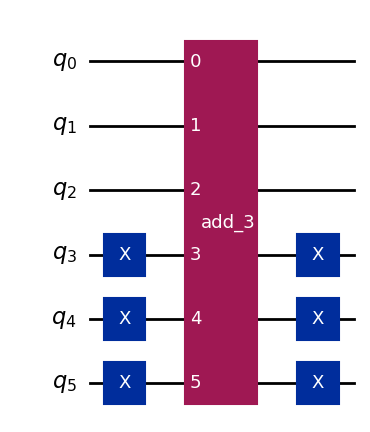

In [3]:
test_circuit = QuantumCircuit(6)

test_circuit.x([3,4,5])
test_circuit.append(adder(3), [0, 1, 2, 3, 4, 5])
test_circuit.x([3,4,5])
test_circuit.draw('mpl') #, wire_order=[8, 4, 0, 5, 1, 6, 2, 7, 3])

In [4]:
state = Statevector.from_label(
    #BBB AAA       B - A A
    '100001'
)
# + Statevector.from_label(
#     #C BBB AAA
#     '0101111'
#     )
state /= np.sqrt(state.inner(state))

state = state.evolve(test_circuit)

# print(state.probabilities([6]))
# print(state.probabilities([3,4,5]))
state.draw('latex')

<IPython.core.display.Latex object>

In [5]:
errs = 0
for b in range(2**3):
    for a in range(2**3):
        if b < a:
            continue
        state = Statevector.from_label(
            #C BBB AAA       B - A A
            f'{b:03b}{a:03b}'
        )
        state = state.evolve(test_circuit)
        if b - a != state.probabilities([3,4,5]).argmax():
            print(f'Error: {b:03b} - {a:03b} = {state.probabilities([1,2,3]).argmax()}')
            errs += 1
print(errs / (2**3 * 2**3))
        

0.0


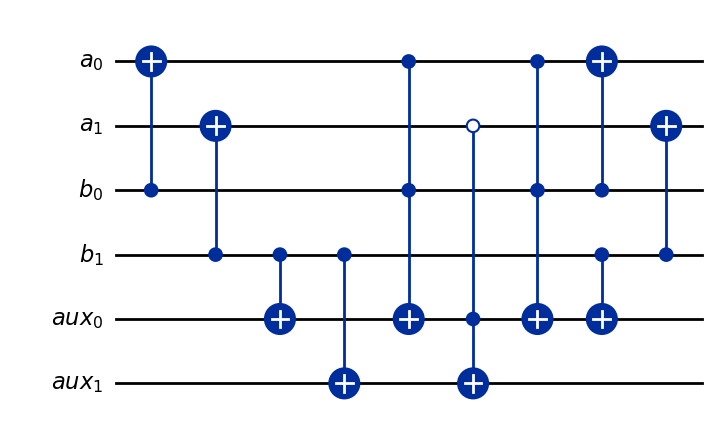

In [6]:
cmp_circuit = cmpr(2)
cmp_circuit.draw('mpl')

In [7]:
state = Statevector.from_label(
    #CC BB AA
    '001111'
    )
state = state.evolve(cmp_circuit)
state.draw('latex')

<IPython.core.display.Latex object>

4
4
4


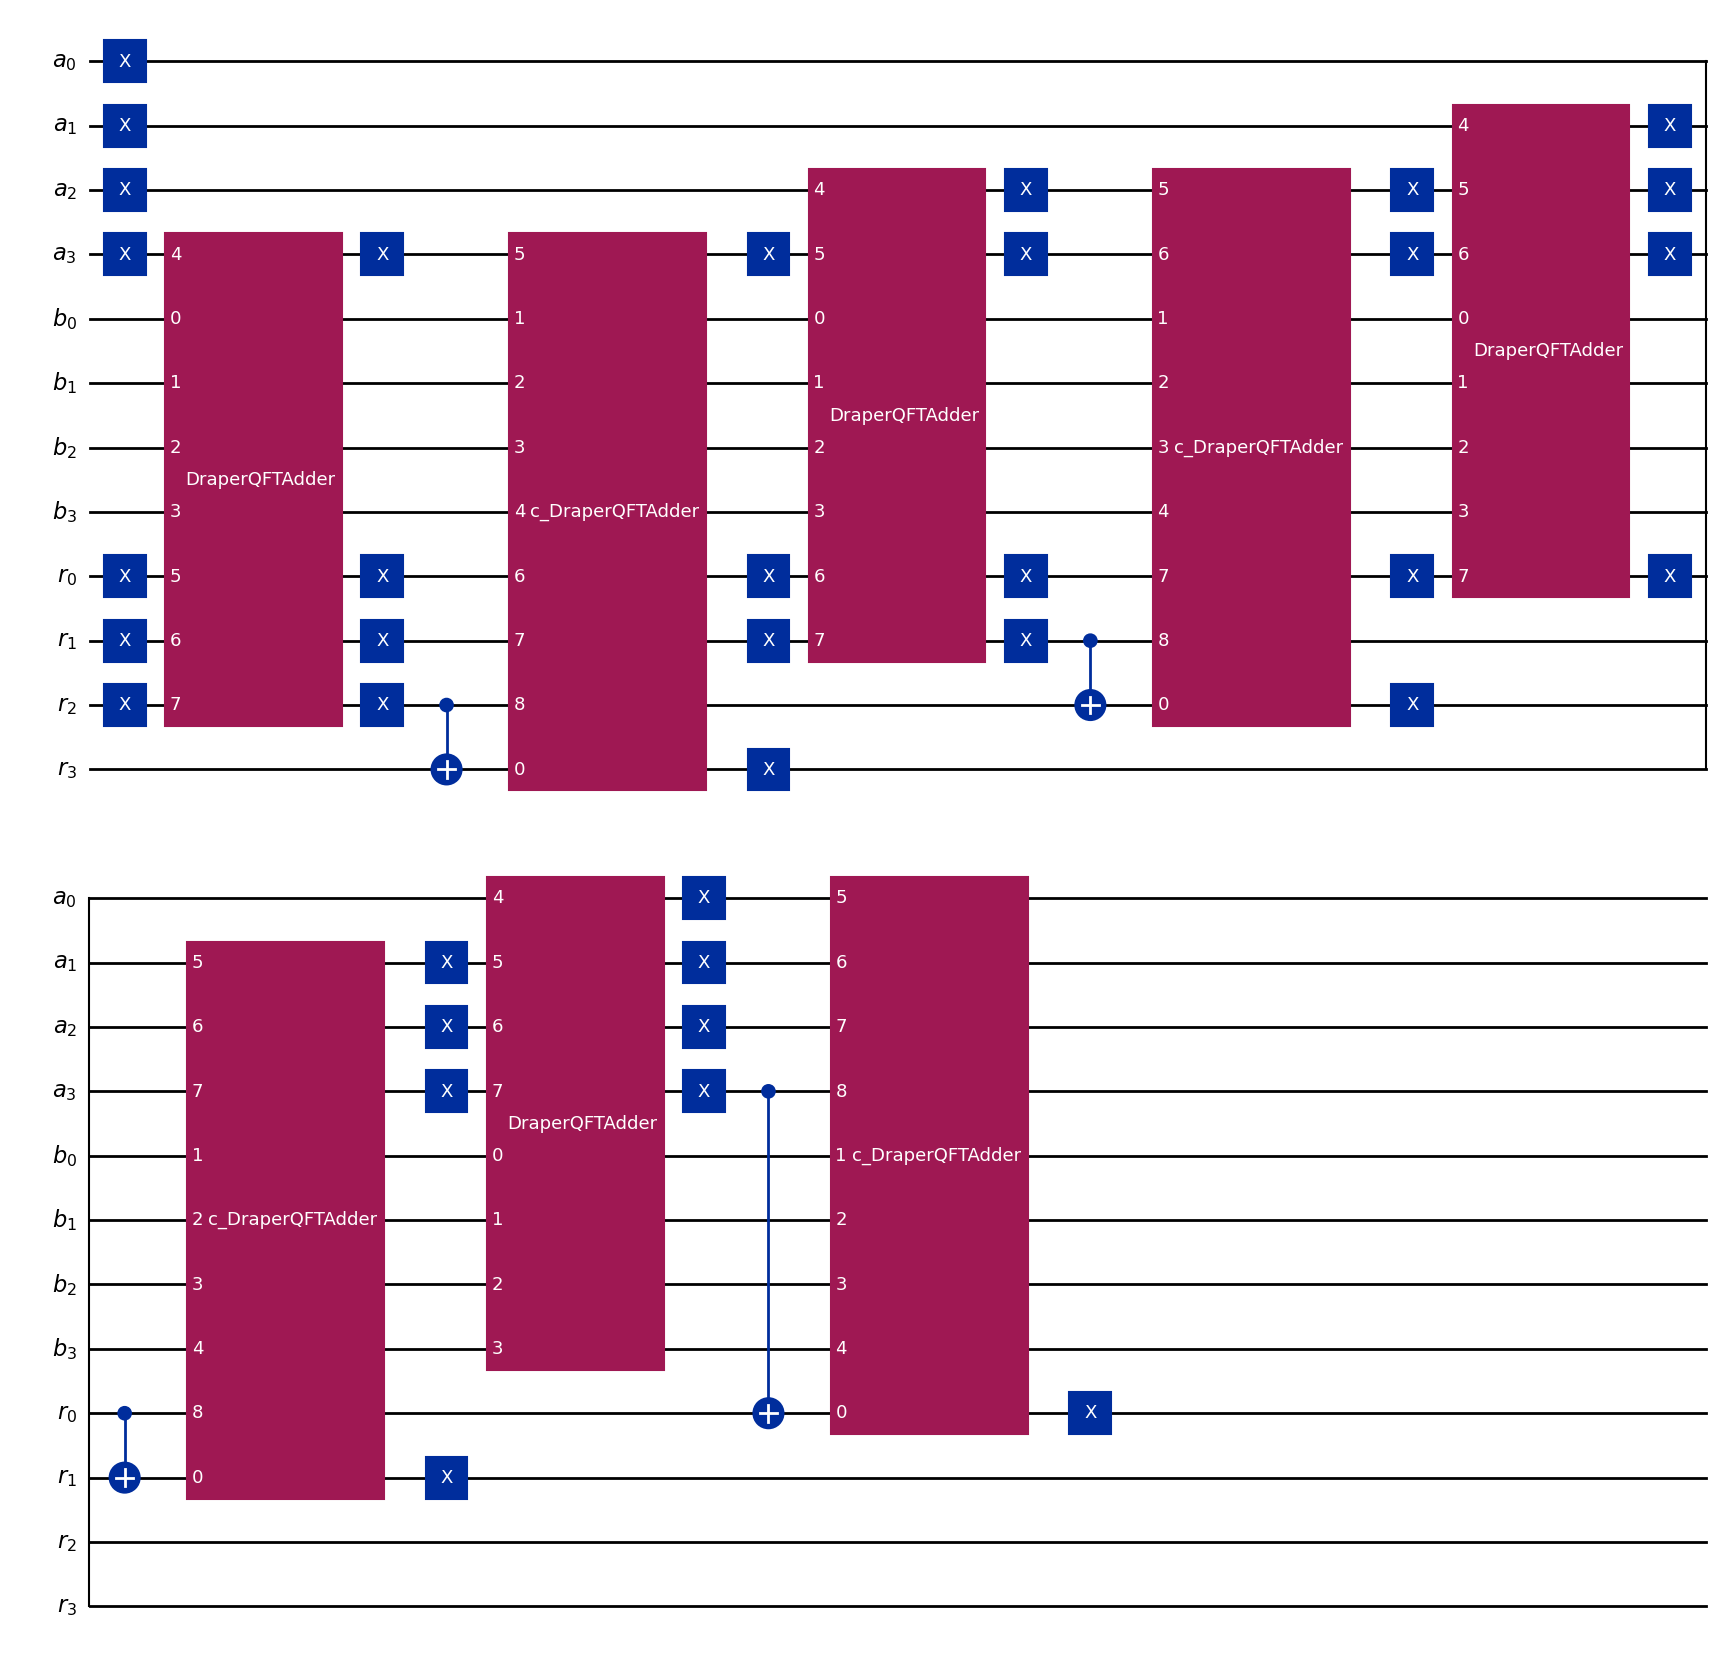

In [13]:
div_circuit = long_division_divider(4, True)
div_circuit.draw('mpl')

In [17]:
state = Statevector.from_label(
    #CC BB AA
    '0000' + '0010' + '0010'
    )
state = state.evolve(div_circuit)
state.draw('latex')

<IPython.core.display.Latex object>

In [10]:
for i in range(2**3):
    for j in range(2**3):
        if j == 0:
            continue
        state = Statevector.from_label(
            f'0000' + f'{j:04b}' + f'{i:04b}'
        )
        state = state.evolve(div_circuit)
        remainder = state.probabilities([0,1,2,3]).argmax()
        quotient = state.probabilities([8,9,10,11]).argmax()
        if i % j != remainder or i // j != quotient:
            print(f'Error: {i:04b} % {j:04b} = {i} % {j}')
            errs += 1

In [11]:
div2_circuit = other_divider(6,2)
state = Statevector.from_label(
    #CC BB AA
    '000' + '00000' + '11' + '000010'
)
state = state.evolve(div_circuit)
print(state.probabilities([0,1,2,3,4,5]).argmax())
state.draw('latex')

6


<IPython.core.display.Latex object>

In [12]:
for i in range(2**5):
    for j in range(2**2):
        if j == 0:
            continue
        state = Statevector.from_label(
            '000' + '00000' + f'{j:02b}' + f'{i:06b}'
        )
        state = state.evolve(div2_circuit)
        remainder = state.probabilities([0,1,2,3,4,5]).argmax()
        quotient = state.probabilities([8,9,10,11,12]).argmax()
        
        if i % j != remainder or i // j != quotient:
            print(i)
            print(f'Error: {i:06b} % {j:02b} problem since {i % j} != {remainder} or {i // j} != {quotient}')
            errs += 1

2
Error: 000010 % 11 problem since 2 != 2 or 0 != 16


KeyboardInterrupt: 